## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
#from sklearn.datasets import load_boston
from tqdm.notebook import tqdm
import pandas as pd
%matplotlib inline

In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

class cboston:
  def __init__(self):
    pass

boston = cboston()
boston.data = data
boston.target = target

In [6]:
a = np.random.rand(5, 3)  # создали случайную матрицу
a

array([[0.69764375, 0.20876896, 0.81654059],
       [0.57228476, 0.33930408, 0.0239226 ],
       [0.69239348, 0.68602422, 0.63618793],
       [0.60922163, 0.49264243, 0.9603266 ],
       [0.28140553, 0.12668433, 0.3158631 ]])

In [7]:
print("Проверили размеры : %s\n" % (a.shape,))

Проверили размеры : (5, 3)



In [8]:
print("Добавили 5 :\n%s\n" % (a + 5))

Добавили 5 :
[[5.69764375 5.20876896 5.81654059]
 [5.57228476 5.33930408 5.0239226 ]
 [5.69239348 5.68602422 5.63618793]
 [5.60922163 5.49264243 5.9603266 ]
 [5.28140553 5.12668433 5.3158631 ]]



In [9]:
print("X*X^T  :\n%s\n" % np.dot(a, a.T))

X*X^T  :
[[1.19702981 0.48962082 1.14573781 1.31201376 0.4806836 ]
 [0.48962082 0.4432094  0.64423632 0.53877736 0.21158487]
 [1.14573781 0.64423632 1.35477304 1.37073392 0.48270016]
 [1.31201376 0.53877736 1.37073392 1.53607475 0.53718015]
 [0.4806836  0.21158487 0.48270016 0.53718015 0.19500749]]



In [11]:
print("Среднее по колонкам :\n%s\n" % (a.mean(axis=-1)))

Среднее по колонкам :
[0.57431777 0.31183715 0.67153521 0.68739689 0.24131765]



In [12]:
print("Изменили размеры :\n%s\n" % (a.reshape(3, 5).shape,))

Изменили размеры :
(3, 5)



## Разминка.

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [ ]:
# YOUR CODE

Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [13]:
x = torch.rand(5, 3)
x

tensor([[0.2519, 0.7163, 0.1533],
        [0.1133, 0.6384, 0.1483],
        [0.7525, 0.1250, 0.4048],
        [0.1552, 0.2925, 0.0397],
        [0.4444, 0.2711, 0.3425]])

In [14]:
print("Проверили размеры : %s\n" % (x.shape,))

Проверили размеры : torch.Size([5, 3])



In [15]:
print("Добавили 5 :\n%s\n" % (x + 5))

Добавили 5 :
tensor([[5.2519, 5.7163, 5.1533],
        [5.1133, 5.6384, 5.1483],
        [5.7525, 5.1250, 5.4048],
        [5.1552, 5.2925, 5.0397],
        [5.4444, 5.2711, 5.3425]])



In [16]:
print("X*X^T  (1):\n%s\n" % (torch.matmul(x, x.transpose(1, 0))))
print("X*X^T  (2):\n%s\n" % (x.mm(x.t())))

X*X^T  (1):
tensor([[0.6000, 0.5086, 0.3411, 0.2547, 0.3586],
        [0.5086, 0.4424, 0.2251, 0.2102, 0.2742],
        [0.3411, 0.2251, 0.7457, 0.1694, 0.5070],
        [0.2547, 0.2102, 0.1694, 0.1112, 0.1619],
        [0.3586, 0.2742, 0.5070, 0.1619, 0.3883]])

X*X^T  (2):
tensor([[0.6000, 0.5086, 0.3411, 0.2547, 0.3586],
        [0.5086, 0.4424, 0.2251, 0.2102, 0.2742],
        [0.3411, 0.2251, 0.7457, 0.1694, 0.5070],
        [0.2547, 0.2102, 0.1694, 0.1112, 0.1619],
        [0.3586, 0.2742, 0.5070, 0.1619, 0.3883]])



In [17]:
print("Среднее по колонкам :\n%s\n" % (x.mean(dim=-1)))

Среднее по колонкам :
tensor([0.3738, 0.3000, 0.4274, 0.1625, 0.3527])



In [18]:
print("Изменили размеры :\n%s\n" % (x.view([3, 5]).shape,))
print("Изменили размеры :\n%s\n" % (x.view_as(x.t()).shape,))

Изменили размеры :
torch.Size([3, 5])

Изменили размеры :
torch.Size([3, 5])



Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype('int64') -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


### Разминка на PyTorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [19]:
# YOUR CODE

### Создаем тензоры в pytorch и снова изучаем базовые операции

In [20]:
x = torch.empty(5, 3)  # пустой тензор
print(x)

tensor([[4.8215e-34, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 9.6948e-34, 0.0000e+00],
        [1.2756e-35, 0.0000e+00, 6.9318e-34],
        [4.5565e-41, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [21]:
x = torch.rand(5, 3)  # тензор со случайными числами
print(x)

tensor([[0.6857, 0.7869, 0.3561],
        [0.7558, 0.1292, 0.0452],
        [0.8185, 0.3691, 0.2553],
        [0.8601, 0.6378, 0.5560],
        [0.4082, 0.5713, 0.0493]])


In [22]:
x = torch.zeros(5, 3, dtype=torch.long)  # тензор с нулями и указанием типов чисел
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [23]:
x = torch.tensor([5.5, 3])  # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [24]:
x = x.new_ones(
    5, 3, dtype=torch.double
)  # используем уже созданный тензор для создания тензора из единичек
print(x, x.size())

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) torch.Size([5, 3])


In [25]:
x = torch.randn_like(x, dtype=torch.float)  # создаем матрицу с размерами как у x
print(x, x.size())

tensor([[-1.4030,  2.0052,  0.9135],
        [ 1.3142,  0.5466, -1.4009],
        [ 0.1659,  0.3284,  0.0364],
        [ 0.2861,  0.3521, -1.3629],
        [ 0.7838, -0.5313, -0.6973]]) torch.Size([5, 3])


In [26]:
y = torch.rand(5, 3)
print(x + y)  # операция сложение

tensor([[-0.4981,  2.2504,  0.9140],
        [ 1.3500,  0.7534, -1.3858],
        [ 0.5709,  0.8720,  0.2240],
        [ 1.0845,  0.5487, -1.0277],
        [ 1.6603,  0.3859,  0.1702]])


In [27]:
z = torch.add(x, y)  # очередная операция сложения
print(z)

tensor([[-0.4981,  2.2504,  0.9140],
        [ 1.3500,  0.7534, -1.3858],
        [ 0.5709,  0.8720,  0.2240],
        [ 1.0845,  0.5487, -1.0277],
        [ 1.6603,  0.3859,  0.1702]])


In [28]:
torch.add(x, y, out=z)  # и наконец последний вид
print(z)

tensor([[-0.4981,  2.2504,  0.9140],
        [ 1.3500,  0.7534, -1.3858],
        [ 0.5709,  0.8720,  0.2240],
        [ 1.0845,  0.5487, -1.0277],
        [ 1.6603,  0.3859,  0.1702]])


In [29]:
print(x * y)  # поэлементное умножение

tensor([[-1.2697e+00,  4.9161e-01,  4.1143e-04],
        [ 4.7114e-02,  1.1301e-01, -2.1261e-02],
        [ 6.7203e-02,  1.7853e-01,  6.8332e-03],
        [ 2.2843e-01,  6.9213e-02, -4.5684e-01],
        [ 6.8703e-01, -4.8737e-01, -6.0497e-01]])


In [30]:
print(x @ y.t())  # матричное умножение

tensor([[-0.7776,  0.3781,  0.6931, -0.4198,  1.4020],
        [ 1.3226,  0.1389,  0.5666,  0.6871,  0.4380],
        [ 0.2307,  0.0744,  0.2526,  0.2092,  0.4783],
        [ 0.3446,  0.0624,  0.0516, -0.1592, -0.6086],
        [ 0.5787, -0.0923, -0.1022,  0.2876, -0.4053]])


In [31]:
print(x.mm(y.t()))  # и опять матричное умножение

tensor([[-0.7776,  0.3781,  0.6931, -0.4198,  1.4020],
        [ 1.3226,  0.1389,  0.5666,  0.6871,  0.4380],
        [ 0.2307,  0.0744,  0.2526,  0.2092,  0.4783],
        [ 0.3446,  0.0624,  0.0516, -0.1592, -0.6086],
        [ 0.5787, -0.0923, -0.1022,  0.2876, -0.4053]])


In [32]:
print(x.unsqueeze(0).shape)  # добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [33]:
print(
    x.unsqueeze(0).squeeze(0).shape
)  # убрали измерение в начале, аналог броадкастинга

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [34]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### Работаем с градиентами руками

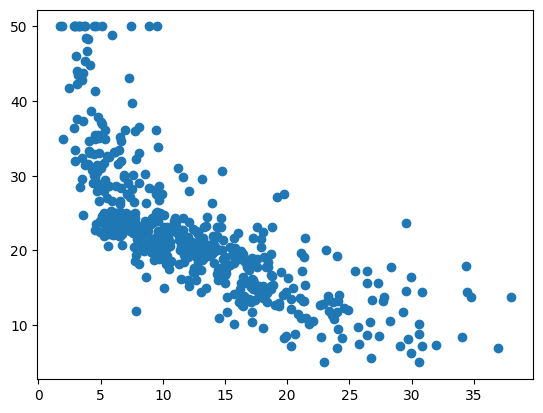

In [35]:
#boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

![torch_grad.png](attachment:torch_grad.png)

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

assert w.grad is None  # только создали тензоры и в них нет градиентов
assert b.grad is None

In [ ]:
y_pred = w * x + b  # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y) ** 2)  # совершаем операции с тензорами
loss.backward()  # считаем градиенты

In [ ]:
assert (
    w.grad is not None
)  # сделали операции и посчитали градиенты, значение должно было появится
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [ ]:
w.data

In [ ]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= # YOUR CODE
    b.data -= # YOUR CODE

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

### Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения

#### Как формировать батчи и пихать их в сетку

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса должно быть два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [ ]:
class RandomDataset(torch.utils.data.Dataset):
    """Our random dataset"""

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [ ]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [ ]:
our_dataset = RandomDataset(x, y)

In [ ]:
our_dataset.__getitem__(1)

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [ ]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [ ]:
for batch in dataloader:
    batch_x = batch["sample"]
    batch_y = batch["target"]
    break
print("Sample:", batch_x)
print("Target:", batch_y)

#### Как сделать сетку

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса должно быть метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [ ]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 3)
)  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(3, 1)
)  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

In [ ]:
y_pred = model(batch_x)  # получили предсказания модели

#### Как написать цикл обучения
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [ ]:
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)  # используем готовый класс от торча для загрузки данных для тренировки
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)  # используем готовый класс от торча для загрузки данных для валидации

train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)  # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=True, num_workers=1
)  # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

In [ ]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [ ]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(784, 128),  # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(),  # функция активации релу
    nn.Linear(128, 10),  # функция активации релу
    nn.Softmax(
        dim=-1
    ),  # софтмакс для получения вероятностного распределения над метками класса
)

optimizer = torch.optim.SGD(
    model.parameters(), lr=0.05
)  # создаем оптимизатор и передаем туда параметры модели

Веса моделей хранятся в виде матриц и выглядят так:

In [ ]:
[x for x in model.named_parameters()]

In [ ]:
for epoch in range(
    11
):  # всего у нас будет 10 эпох (10 раз подряд пройдемся по всем батчам из трейна)
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model(x_train)  # делаем предсказания
        loss = nn.CrossEntropyLoss()(y_pred, y_train)  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        mean_val_loss = []  # сюда будем складывать средний лосс по батчам
        val_accuracy = []
        with torch.no_grad():  # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
                y_pred = model(x_val)  # делаем предсказания
                loss = nn.CrossEntropyLoss()(y_pred, y_val)  # считаем лосс
                mean_val_loss.append(loss.numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist()
                )
        print(
            "Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}".format(
                epoch=epoch, loss=np.mean(mean_val_loss), accuracy=np.mean(val_accuracy)
            )
        )  # выводим статистику

### Дополнительные материалы:

* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)